In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [162]:
# load the data, keep only selected columns
# Read the file using super fast Pandas.read_csv
def load_required_data(path, required_columns, start_index, end_index):
    dataframe = pd.read_json(path, lines=True)
    dataframe = dataframe[required_columns]
    return dataframe, dataframe.values

In [163]:
dataframe, values = load_required_data('reviews_Apps_for_Android_5.json', ["asin", "reviewerID", "overall"], 0, 20000)

In [164]:
# Create user-item matrix given a matrix and mapping from original matrix columns to new matrix rows/columns
def create_user_item_matrix(data, rowMapping, columnMapping):
    # Create table of users to items by taking row and column pivots
    # Rows of user-item table are users
    rows, row_pos = np.unique(data[:, rowMapping], return_inverse=True)
    # Columns of user-item table are movies
    cols, col_pos = np.unique(data[:, columnMapping], return_inverse=True)

    pivot_table = np.zeros((len(rows), len(cols)), dtype=data.dtype)
    pivot_table[row_pos, col_pos] = data[:, 2]
    return pivot_table, rows, cols

In [165]:
# user item matrix with ratings
ratings_matrix, rows, cols = create_user_item_matrix(values, rowMapping=1, columnMapping=0)

In [166]:
# get the unique rating count
# grab the ratings column from the dataset
ratings = values[:, 2]
unique_ratings, counts_elements = np.unique(ratings, return_counts=True)
print("Frequency of unique ratings:")
rating_frequency = np.asarray((unique_ratings, counts_elements))
print rating_frequency

Frequency of unique ratings:
[[1 2 3 4 5]
 [78713 44385 85121 158081 386637]]


In [167]:
# total number of ratings available
total_ratings = counts_elements.sum()
print total_ratings

752937


In [168]:
# get ratings percentage
ratings_distribution = np.true_divide(rating_frequency[1], total_ratings)

overall_rating = np.asarray((unique_elements, ratings_distribution * 100))
print overall_rating

[[1 2 3 4 5]
 [10.454128300242916 5.894915510859474 11.305195521006405
  20.995249270523296 51.3505113973679]]


In [169]:
# Display percentage count of each rating
overall_rating_distribution = zip(unique_ratings,ratings_distribution*100)
print overall_rating_distribution

[(1, 10.454128300242916), (2, 5.894915510859474), (3, 11.305195521006405), (4, 20.995249270523296), (5, 51.3505113973679)]


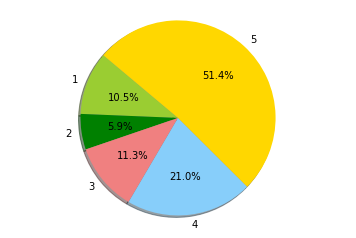

In [170]:
# plot the pie chart 

def plotPieChart(labels, sizes):
    
    colors = ['yellowgreen', 'green', 'lightcoral', 'lightskyblue', 'gold']
    # explode = (0, 0, 0, 0, 0.1)  # explode 1st slice

    # Plot
    plt.pie(sizes, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.show()
    
plotPieChart(overall_rating[0], overall_rating[1])

In [171]:
# average rating
average_rating = np.true_divide(ratings.sum(), len(ratings))

print "Average rating: ", average_rating

Average rating:  3.968930999539138


In [172]:
# ratings per item
ratings_per_item = np.count_nonzero(ratings_matrix, axis=0)
print ratings_per_item

[17 62 96 ...  5  7 17]


In [173]:
print "total number of items: ", len(ratings_per_item)        
print "highest number of ratings for an item: ", ratings_per_item.max()         
print "smallest number of ratings for an item: ", ratings_per_item.min()         

total number of items:  13209
highest number of ratings for an item:  6282
smallest number of ratings for an item:  5


In [174]:
def plotHistogram(x, printingString, x_axis_range, xlabel, title):
    num_bins = 55
    n, bins, patches = plt.hist(x, 30, range=x_axis_range, facecolor='blue', alpha=0.5)
    # plt.xticks(range(0, 1000))
    # plt.yticks(range(1, 8000))

    plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.title(title)

    plt.show() 

    print printingString, x.mean()
    

In [175]:
# ratings per user
ratings_per_user = np.count_nonzero(ratings_matrix, axis=1)
print ratings_per_user

print "total number of users: ", len(ratings_per_user)        
print "highest number of ratings by a user: ", ratings_per_user.max()         
print "smallest number of ratings by a user: ", ratings_per_user.min() 


[12  5 18 ...  5  5  9]
total number of users:  87271
highest number of ratings by a user:  565
smallest number of ratings by a user:  5


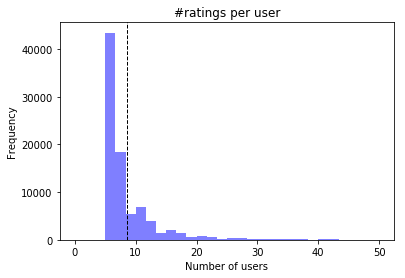

Average #ratings/user:  8.627573879066356


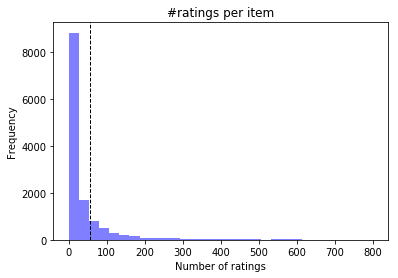

Average #ratings/item:  57.001816942993415


In [176]:
plotHistogram(ratings_per_user, "Average #ratings/user: ", [0, 50], 'Number of users', '#ratings per user')
plotHistogram(ratings_per_item, "Average #ratings/item: ", [0, 800], 'Number of ratings', '#ratings per item')